In [1]:
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from natsort import natsorted
import imageio
import math
import os
import natsort  # Per ordinare i file in modo naturale (es. 1, 2, 10 invece di 1, 10, 2)


import os
import math
import numpy as np
import pyvista as pv
import natsort


plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.rc('legend',fontsize=20) # using a size in points
plt.rc('legend',fontsize='large') # using a named size
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=23)

# MESH

Campi disponibili: ['pointLevel', 'thickness', 'thicknessFraction', 'nSurfaceLayers', 'k', 'alphat', 'nut', 'N2', 'O2', 'p', 'Ydefault', 'T', 'epsilon', 'cellLevel', 'U', 'cellID', 'thickness', 'thicknessFraction', 'nSurfaceLayers', 'k', 'alphat', 'nut', 'N2', 'O2', 'p', 'Ydefault', 'T', 'epsilon', 'cellLevel', 'U']


/home/sarse/anaconda3/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/sarse/anaconda3/lib/python3.12/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


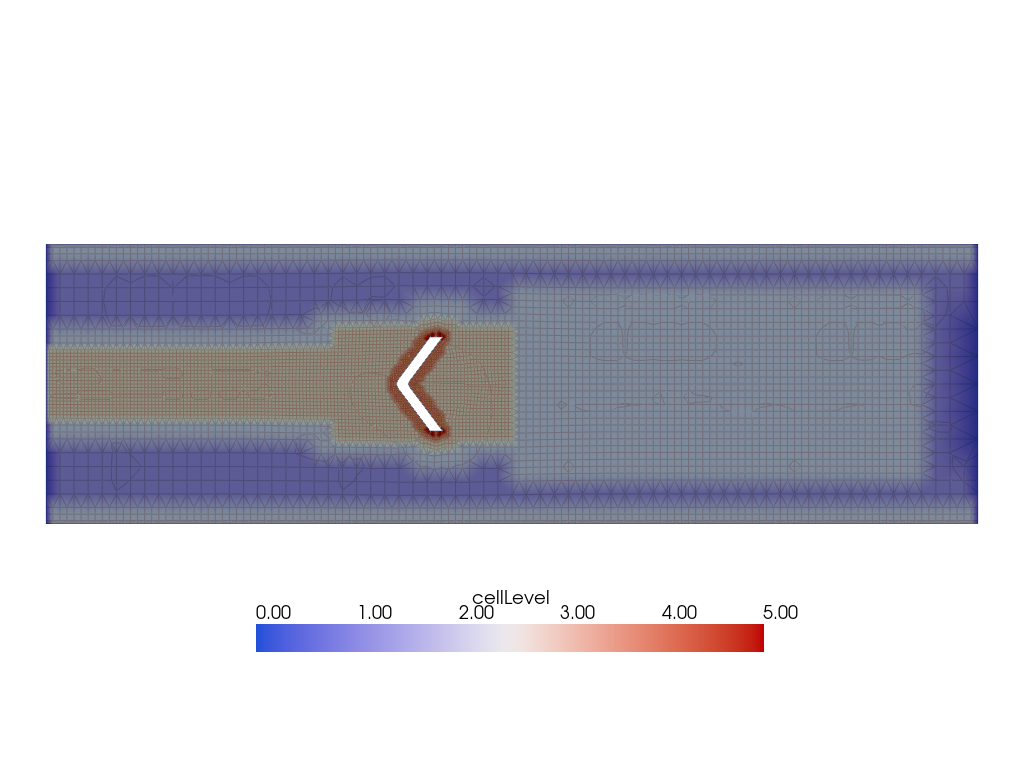

In [3]:
import pyvista as pv
import numpy as np

# Percorso del file VTK
vtk_folder = "/home/sarse/OpenFOAM/sarse-12/run/Assignment/prova2/VTK/"
file = "prova2_0.vtk"

# Caricare il file VTK
mesh = pv.read(vtk_folder + file)

# Verificare la presenza del campo "cellLevel"
print("Campi disponibili:", mesh.array_names)
if "cellLevel" not in mesh.cell_data:
    raise ValueError("Il campo 'cellLevel' non è presente nei dati della mesh!")

# Creare uno slice nel piano XY (z=0)
slice_mesh = mesh.slice(normal=(0, 0, 1), origin=(0, 0, 0))

# Creare il plotter
plotter = pv.Plotter()

sargs = dict(n_labels=6)

# Aggiungere la mesh e la legenda centrata
plotter.add_mesh(slice_mesh, scalars="cellLevel", cmap="coolwarm", show_scalar_bar=True, scalar_bar_args=sargs)
plotter.add_mesh(slice_mesh, scalars="cellLevel", show_edges=True, opacity=0.3, show_scalar_bar=False)
plotter.scalar_bar.SetPosition(0.25, 0.15)  # Posizionare la barra della legenda al centro in basso
plotter.scalar_bar.SetWidth(0.5)  # Impostare la larghezza della barra
plotter.scalar_bar.SetHeight(0.1)  # Impostare l'altezza della barra

# Impostare la vista XY e ruotare di 90° attorno a Z
plotter.view_yx()
plotter.zoom_camera(1.3)

# Mostrare il plot
plotter.show()

/home/sarse/anaconda3/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/sarse/anaconda3/lib/python3.12/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


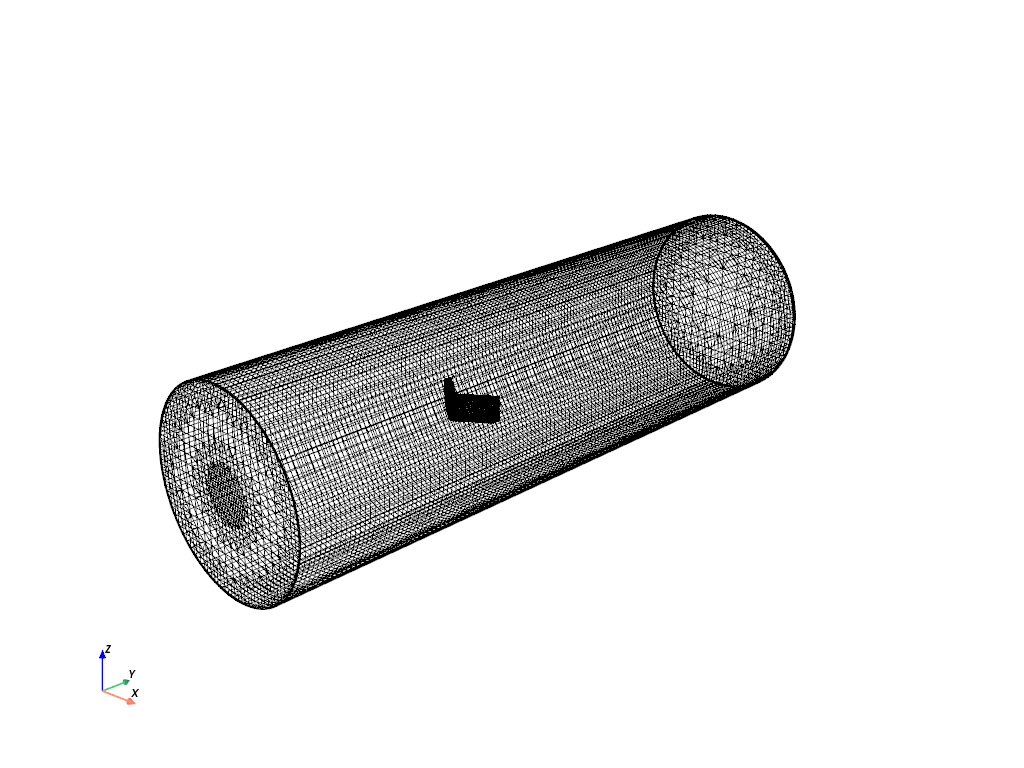

In [24]:
import pyvista as pv
import numpy as np

# Percorso del file VTK
vtk_folder = "/home/sarse/OpenFOAM/sarse-12/run/Assignment/prova2/VTK/"
file = "prova2_0.vtk"

# Caricare il file VTK
mesh = pv.read(vtk_folder + file)

# Creare il plotter
plotter = pv.Plotter()

sargs = dict(n_labels=6)

# Aggiungere la mesh e la legenda centrata
plotter.add_mesh(mesh, style="wireframe", color="black", show_edges=True)

# Impostare la vista XY e ruotare di 90° attorno a Z
plotter.zoom_camera(1.3)
plotter.camera_position = (1, -1, 0.6)

plotter.add_axes()

# Mostrare il plot
plotter.show()

/home/sarse/anaconda3/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/sarse/anaconda3/lib/python3.12/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


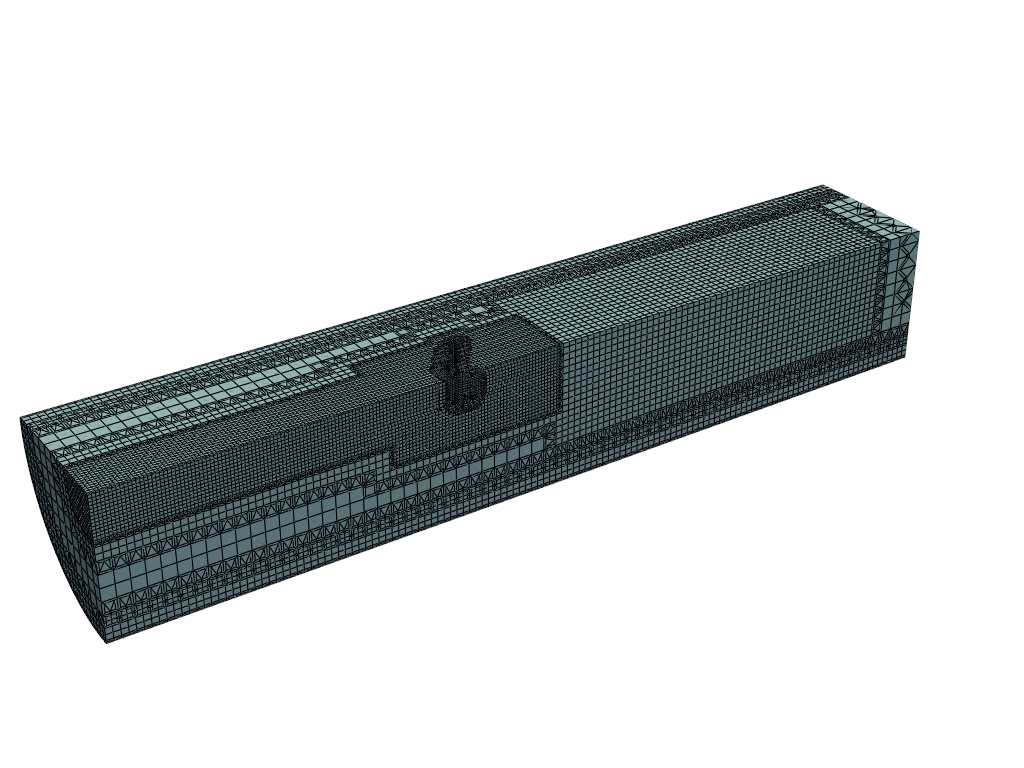

In [30]:
import pyvista as pv
import numpy as np

# Percorso del file VTK
vtk_folder = "/home/sarse/OpenFOAM/sarse-12/run/Assignment/prova2/VTK/"
file = "prova2_0.vtk"

# Caricare il file VTK
mesh = pv.read(vtk_folder + file)

# Creare il plotter
plotter = pv.Plotter()  # Due pannelli per le clip

# Parametri di clipping
clip_x = mesh.clip(normal=(-1, 0, 0), invert=False, origin=(0.01, 0, 0))
clip_z = clip_x.clip(normal=(0, 0, -1), invert=False, origin = (0, 0, 0.01))

# Aggiungere la clip lungo X
plotter.add_mesh(clip_z, show_edges=True, cmap="coolwarm")
#plotter.add_text("Clip Normal X", font_size=10)
plotter.camera_position= (0.6, -0.4, 0.4)
#plotter.add_axes()

plotter.zoom_camera(1.3)


# Mostrare il plot
plotter.show()

/home/sarse/anaconda3/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/sarse/anaconda3/lib/python3.12/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


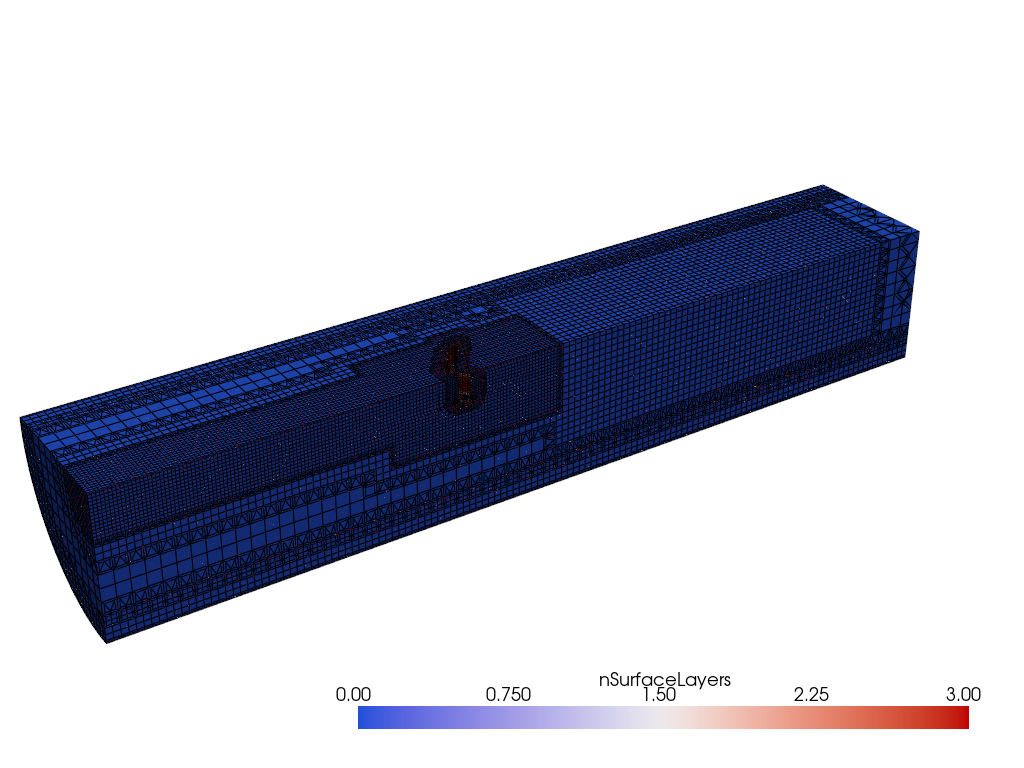

In [37]:
import pyvista as pv
import numpy as np

# Percorso del file VTK
vtk_folder = "/home/sarse/OpenFOAM/sarse-12/run/Assignment/prova2/VTK/"
file = "prova2_0.vtk"

# Caricare il file VTK
mesh = pv.read(vtk_folder + file)

# Creare il plotter
plotter = pv.Plotter()  # Due pannelli per le clip

# Parametri di clipping
clip_x = mesh.clip(normal=(-1, 0, 0), invert=False, origin=(0.01, 0, 0))
clip_z = clip_x.clip(normal=(0, 0, -1), invert=False, origin = (0, 0, 0.01))

# Aggiungere la clip lungo X
plotter.add_mesh(clip_z, scalars="nSurfaceLayers", show_edges=True, cmap="coolwarm")
#plotter.add_text("Clip Normal X", font_size=10)
plotter.camera_position= (0.6, -0.4, 0.4)
#plotter.add_axes()

plotter.zoom_camera(1.3)


# Mostrare il plot
plotter.show()

/home/sarse/anaconda3/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/sarse/anaconda3/lib/python3.12/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


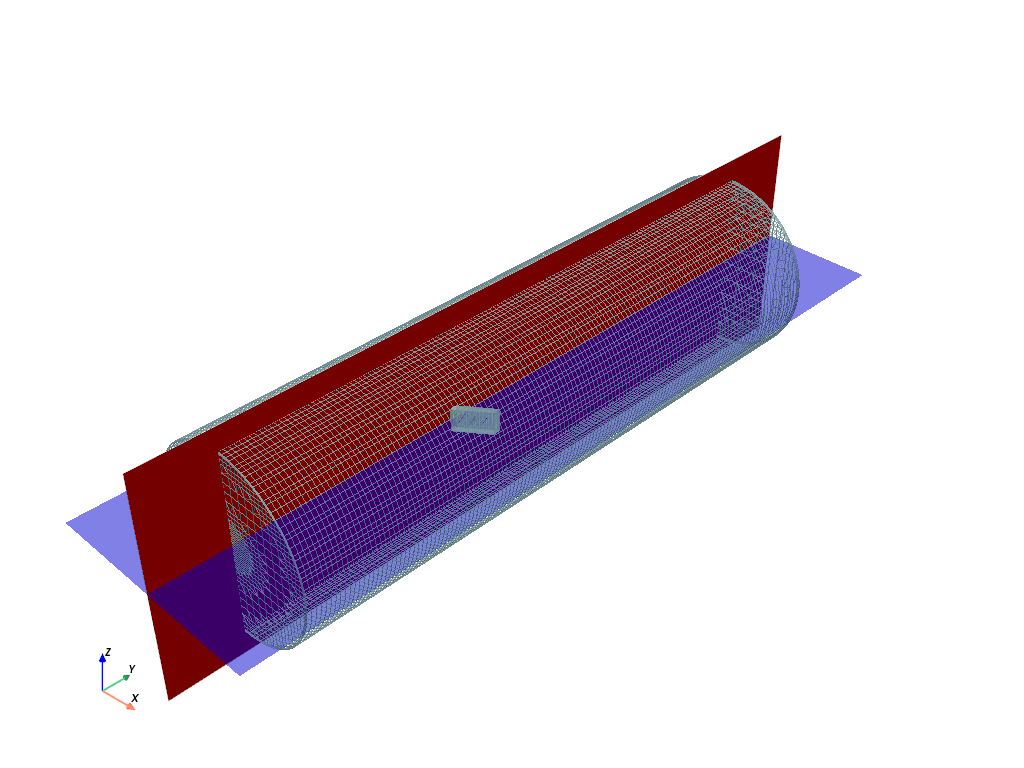

In [5]:
geometry_mesh = pv.read("/home/sarse/Desktop/UniCode/UniversityCODE/CFD/Assignment/5-final/VTK/geometry.vtk")

pl = pv.Plotter()
pl.add_mesh(geometry_mesh, opacity= 0.6, style = "wireframe")
planeXY = pv.Plane(center=(0.0, 0.1, 0.0), direction=(0.0, 0.0, 1.0), i_size = 0.3, j_size=1)
planeZY = pv.Plane(center=(0.0, 0.1, 0.0), direction=(1.0, 0.0, 0.0),  i_size = 0.3)

pl.add_axes()

pl.camera_position = (1, -1, 1)

pl.add_mesh(planeXY, color="blue", opacity=0.5)
pl.add_mesh(planeZY, color="red",)
pl.show()